In [1]:
# Libs

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [2]:
dados = pd.read_csv('dados_original_bdmep.csv')

In [3]:
dados.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,83985,01/01/1962,0,0.0,25.4,0.0,0.0,1.6,21.70,86.25,4.000000
1,83985,01/01/1962,1200,0.0,0.0,18.4,0.0,0.0,0.00,0.00,0.000000
2,83985,02/01/1962,0,0.0,29.2,0.0,0.0,1.0,23.16,76.00,0.666667
3,83985,02/01/1962,1200,15.8,0.0,20.0,0.0,0.0,0.00,0.00,0.000000
4,83985,03/01/1962,0,0.0,24.6,0.0,0.0,0.8,18.66,67.50,4.000000


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23802 entries, 0 to 23801
Data columns (total 11 columns):
Estacao                      23802 non-null int64
Data                         23802 non-null object
Hora                         23802 non-null int64
Precipitacao                 23802 non-null float64
TempMaxima                   23802 non-null float64
TempMinima                   23802 non-null float64
Insolacao                    23802 non-null float64
Evaporacao Piche             23802 non-null float64
Temp Comp Media              23802 non-null float64
Umidade Relativa Media       23802 non-null float64
Velocidade do Vento Media    23802 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 2.0+ MB


In [5]:
# Transforma Data string em numerica

dados['Dia'] = dados.Data.apply(lambda data : data.split('/')[0])
dados['Mes'] = dados.Data.apply(lambda data : data.split('/')[1])
dados['Ano'] = dados.Data.apply(lambda data : data.split('/')[2])

# Remove data string
dados = dados.drop(['Data'], axis=1)

dados.head()

,Estacao,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Dia,Mes,Ano
0,83985,0,0.0,25.4,0.0,0.0,1.6,21.70,86.25,4.000000,01,01,1962
1,83985,1200,0.0,0.0,18.4,0.0,0.0,0.00,0.00,0.000000,01,01,1962
2,83985,0,0.0,29.2,0.0,0.0,1.0,23.16,76.00,0.666667,02,01,1962
3,83985,1200,15.8,0.0,20.0,0.0,0.0,0.00,0.00,0.000000,02,01,1962
4,83985,0,0.0,24.6,0.0,0.0,0.8,18.66,67.50,4.000000,03,01,1962


In [6]:
# Seleciona somente os dados relativos a precipitacao
# Uma vez que a medicao de precipitacao nao eh feita na leitura da meia noite (Hora = 0), pode-se ignorar esses dados

precipitacao = dados[['Dia', 'Mes', 'Ano', 'Hora', 'Precipitacao']].copy()
precipitacao = precipitacao[precipitacao.Hora == 1200].drop(['Hora'], axis=1).reset_index().drop(['index'], axis=1)

precipitacao.head()

,Dia,Mes,Ano,Precipitacao
0,01,01,1962,0.0
1,02,01,1962,15.8
2,03,01,1962,2.4
3,04,01,1962,0.0
4,05,01,1962,0.0


In [7]:
# Explorando os dados, verifiquei que existem anos que nao estao presentes nos dados
# Nao existem dados relativos aos ano 1972-1976, 1985-1987, 1989-1990, 1992-1993, 1995 e 1999

anos = precipitacao.Ano.unique()
anos

array(['1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1988', '1991', '1994', '1996', '1997', '1998',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [8]:
# Alem disso, ha meses faltando

mesesPorAno = {}

for ano in anos:
    mesesPorAno[ano] = precipitacao[precipitacao.Ano == ano].Mes.unique()
    
for i in range(1962, 2017):
    key = str(i)
    if key in mesesPorAno:
        print key, mesesPorAno[key]

1962 ['01' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
1963 ['01' '02' '03' '04' '05' '06' '07' '08' '09' '11' '12']
1964 ['01' '02' '03' '04' '05' '06' '08' '09' '10' '11' '12']
1965 ['01' '02' '03' '04' '05' '06' '07' '08' '09' '11' '12']
1966 ['01' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
1967 ['01']
1968 ['02' '03' '04' '05' '06' '07' '09' '10' '11' '12']
1969 ['02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
1970 ['01' '02' '04' '06' '07' '08' '09' '10' '11' '12']
1971 ['04']
1977 ['09' '10' '11' '12']
1978 ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
1979 ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
1980 ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
1981 ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
1982 ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
1983 ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
1984 ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' 

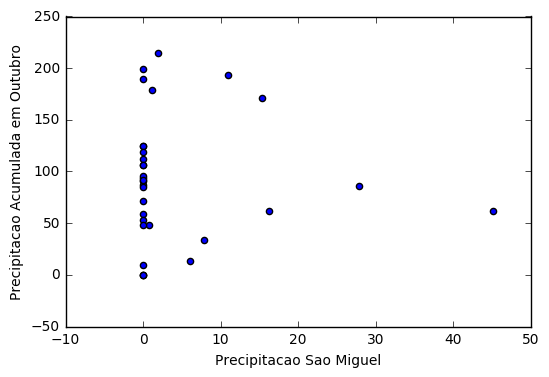

In [69]:
# Mito 1: se chove no dia de Sao Miguel (29 de Setembro) chove mais no mes de Outubro

saoMiguel = precipitacao[precipitacao.Dia == '29']
saoMiguel = saoMiguel[saoMiguel.Mes == '09'].drop(['Dia', 'Mes'], axis=1).set_index('Ano')

outubros = precipitacao[precipitacao.Mes == '10'].drop(['Dia', 'Mes'], axis=1).groupby('Ano').sum()

saoMiguel.join(outubros, lsuffix=' Sao Miguel', rsuffix=' Acumulada em Outubro').plot(kind='scatter', x = 'Precipitacao Sao Miguel', y = 'Precipitacao Acumulada em Outubro')

# Parece que nao

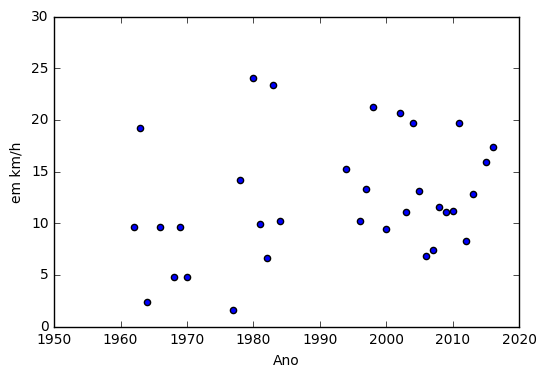

In [91]:
# Mito 2: vento de finados

vento = dados[['Dia', 'Mes', 'Ano', 'Hora', 'Velocidade do Vento Media']].copy()
vento = vento[vento.Hora == 0].drop(['Hora'], axis=1).reset_index().drop(['index'], axis=1)

finados = vento[vento.Dia == '02']
finados = finados[finados.Mes == '11'].drop(['Dia', 'Mes'], axis=1)
finados['em km/h'] = finados['Velocidade do Vento Media'].apply(lambda v : v * 3.6)
finados['Ano'] = finados.Ano.apply(lambda a : int(a))
finados.plot(kind='scatter', x='Ano', y='em km/h')
